In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [231]:
df = pd.read_csv('AviationData.csv',encoding='latin1',low_memory=False)

In [232]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [233]:
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [234]:
df.shape

(88889, 31)

In [235]:
##Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [118]:
#DATA CLEANING 

In [236]:
##Checking for the missing data
df.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

In [237]:
##Handling Missing Values
##Columns such as Injury.Severity, Aircraft.damage and Weather.condition are critical to the objectives of the analysis.
##Drop columns that have excess missing values (>50%)
##Drop rows for the critical columns that have sparse missing data
df_cleaned = df.drop(columns=['Aircraft.Category', 'Schedule', 'Air.carrier'])

In [238]:
## Use mode for the categorical variables
df['Weather.Condition'].fillna(df['Weather.Condition'].mode()[0], inplace=True)
df['Aircraft.damage'].fillna('Unknown', inplace=True)

In [239]:
##Use Mean for the Numerical Variables
df['Total.Fatal.Injuries'].fillna(df['Total.Fatal.Injuries'].mean(), inplace=True)
## Grouped Computation of the Numerical Variables
df['Total.Fatal.Injuries'] = df.groupby('Aircraft.damage')['Total.Fatal.Injuries'].apply(
    lambda x: x.fillna(x.mean()))

In [240]:
##Correlation Check
df.corr()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Number.of.Engines,1.000000,0.091553,0.046157,0.098162,0.406058
Total.Fatal.Injuries,0.091553,1.000000,0.135099,0.051716,-0.012921
Total.Serious.Injuries,0.046157,0.135099,1.000000,0.326849,0.052869
Total.Minor.Injuries,0.098162,0.051716,0.326849,1.000000,0.147770
Total.Uninjured,0.406058,-0.012921,0.052869,0.147770,1.000000


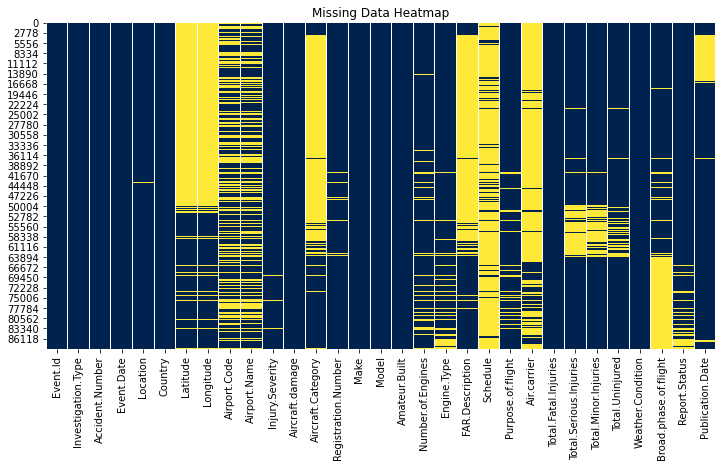

In [242]:
##Missing Value Visualization
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="cividis")  # Alternative to viridis
plt.title("Missing Data Heatmap")
plt.show()

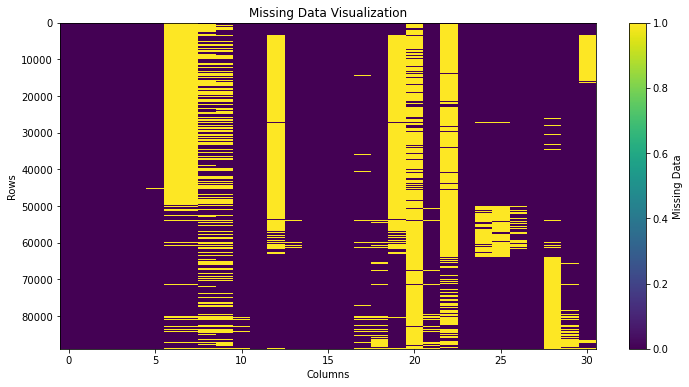

In [243]:
#A heatmap to check for the colors
missing_data = df.isnull()
plt.figure(figsize=(12, 6))
plt.imshow(missing_data, aspect="auto", cmap="viridis", interpolation="none")
plt.colorbar(label="Missing Data")
plt.title("Missing Data Visualization")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()

In [248]:
##Check the state of the dataset after cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         88889 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [245]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,88889.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.122070,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.647855,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [246]:
df.shape

(88889, 31)

In [249]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [250]:
#Explore the Data (EDA)
df.describe()


,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,88889.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.122070,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.647855,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


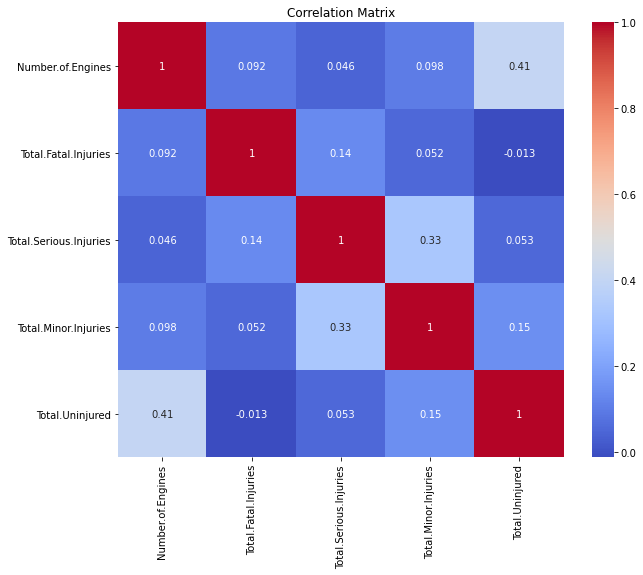

In [251]:
#Visualize Relationships using Correlation
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [253]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [252]:
#Dropping columns that have more than 25% of the total data missing. This will make the data frame easier to handle.
columns_to_drop = ['Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Aircraft.Category', 'FAR.Description', 'Schedule', 'Air.carrier', 'Broad.phase.of.flight', 'Report.Status', 'Amateur.Built', 'Accident.Number', 'Registration.Number', 'Publication.Date', 'Publication.Date', 'Report.Status', 'Engine.Type']
df_clean = df.drop(columns=columns_to_drop)

In [255]:
#Checking the columns after cleaning
df_clean.columns

Index(['Event.Id', 'Investigation.Type', 'Event.Date', 'Location', 'Country',
       'Injury.Severity', 'Aircraft.damage', 'Make', 'Model',
       'Number.of.Engines', 'Purpose.of.flight', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition'],
      dtype='object')

In [256]:
#Check for duplicates
df.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [257]:
#Further cleaning
columns_to_drop = ['Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Aircraft.Category',
                   'FAR.Description', 'Schedule', 'Air.carrier', 'Broad.phase.of.flight',
                   'Report.Status', 'Amateur.Built', 'Accident.Number', 'Registration.Number',
                   'Publication.Date', 'Engine.Type']
df_clean = df.drop(columns=columns_to_drop)
print(df_clean.columns)

Index(['Event.Id', 'Investigation.Type', 'Event.Date', 'Location', 'Country',
       'Injury.Severity', 'Aircraft.damage', 'Make', 'Model',
       'Number.of.Engines', 'Purpose.of.flight', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition'],
      dtype='object')


In [258]:
df.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage               0
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries          0
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition             0
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

In [259]:
#Check the shape of the data
df_clean.shape

(88889, 16)

In [260]:
df.head

<bound method NDFrame.head of              Event.Id Investigation.Type Accident.Number  Event.Date  \
0      20001218X45444           Accident      SEA87LA080  1948-10-24   
1      20001218X45447           Accident      LAX94LA336  1962-07-19   
2      20061025X01555           Accident      NYC07LA005  1974-08-30   
3      20001218X45448           Accident      LAX96LA321  1977-06-19   
4      20041105X01764           Accident      CHI79FA064  1979-08-02   
...               ...                ...             ...         ...   
88884  20221227106491           Accident      ERA23LA093  2022-12-26   
88885  20221227106494           Accident      ERA23LA095  2022-12-26   
88886  20221227106497           Accident      WPR23LA075  2022-12-26   
88887  20221227106498           Accident      WPR23LA076  2022-12-26   
88888  20221230106513           Accident      ERA23LA097  2022-12-29   

              Location        Country   Latitude   Longitude Airport.Code  \
0      MOOSE CREEK, ID  Unit

In [265]:
print(df_clean.isnull().sum())

Event.Id                      0
Investigation.Type            0
Event.Date                    0
Location                     52
Country                     226
Injury.Severity            1000
Aircraft.damage               0
Make                         63
Model                        92
Number.of.Engines          6084
Purpose.of.flight          6192
Total.Fatal.Injuries          0
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition             0
dtype: int64


In [266]:
df_clean.shape

(88889, 16)

In [267]:
#Replace Missing Values
categorical_columns = ['Location', 'Country', 'Aircraft.Category']
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)


In [276]:
numerical_columns = ['Latitude', 'Longitude', 'Total.Uninjured']
for col in numerical_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    if df[col].isnull().any():
        df[col].fillna(df[col].mean(), inplace=True)

In [270]:
columns_to_drop = ['FAR.Description', 'Schedule', 'Air.carrier']
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

In [271]:
columns_to_drop = ['Airport.Code', 'Airport.Name', 'Broad.phase.of.flight', 'Publication.Date']
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

In [272]:
categorical_columns = ['Registration.Number', 'Make', 'Model', 'Amateur.Built']
for col in categorical_columns:
    if col in df.columns:
        df[col].fillna(df[col].mode()[0], inplace=True)

In [273]:
numerical_columns = ['Number.of.Engines', 'Engine.Type']
for col in numerical_columns:
    if col in df.columns:
        # Convert to numeric, coercing errors to NaN
        df[col] = pd.to_numeric(df[col], errors='coerce')
        # Fill missing values with the column mean
        df[col].fillna(df[col].mean(), inplace=True)


In [278]:
#Handling missing values based on column Type
df['Engine.Type'].fillna('Unknown', inplace=True)
df['Purpose.of.flight'].fillna(df['Purpose.of.flight'].mode()[0], inplace=True)
df['Report.Status'].fillna('Incomplete', inplace=True)
df['Injury.Severity'].fillna('Unknown', inplace=True)
df['Total.Serious.Injuries'].fillna(df['Total.Serious.Injuries'].mean(), inplace=True)
df['Total.Minor.Injuries'].fillna(df['Total.Minor.Injuries'].mean(), inplace=True)

In [290]:
df.isnull().sum()

Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Latitude                  0
Longitude                 0
Injury.Severity           0
Aircraft.damage           0
Aircraft.Category         0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Report.Status             0
dtype: int64

In [291]:
df.to_csv('cleaned_data.csv', index=False)

In [293]:
df.shape

(88889, 24)

In [189]:
#Resolving Mixed Type Columns
print(df.dtypes)

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status 

In [191]:
#Convert to a single type
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')  # Convert to float
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')

In [80]:
#The correlation between the five columns
df.corr()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Event.Year
Number.of.Engines,1.000000,0.091553,0.046157,0.098162,0.406058,-0.018393
Total.Fatal.Injuries,0.091553,1.000000,0.135099,0.051716,-0.012921,0.017132
Total.Serious.Injuries,0.046157,0.135099,1.000000,0.326849,0.052869,0.033246
Total.Minor.Injuries,0.098162,0.051716,0.326849,1.000000,0.147770,-0.018031
Total.Uninjured,0.406058,-0.012921,0.052869,0.147770,1.000000,0.033793
Event.Year,-0.018393,0.017132,0.033246,-0.018031,0.033793,1.000000


In [284]:
#Summary and Exploration of Data
df.nunique()

Event.Id                  87951
Investigation.Type            2
Accident.Number           88863
Event.Date                14782
Location                  27758
Country                     219
Latitude                   8879
Longitude                  9272
Injury.Severity             110
Aircraft.damage               4
Aircraft.Category            15
Registration.Number       79105
Make                       8237
Model                     12318
Amateur.Built                 2
Number.of.Engines             8
Engine.Type                   1
Purpose.of.flight            26
Total.Fatal.Injuries        126
Total.Serious.Injuries       51
Total.Minor.Injuries         58
Total.Uninjured             380
Weather.Condition             4
Report.Status             17076
dtype: int64

In [97]:
#Summary statistics for numerical columns
df.describe

<bound method NDFrame.describe of              Event.Id Investigation.Type Accident.Number  Event.Date  \
0      20001218X45444           Accident      SEA87LA080  1948-10-24   
1      20001218X45447           Accident      LAX94LA336  1962-07-19   
2      20061025X01555           Accident      NYC07LA005  1974-08-30   
3      20001218X45448           Accident      LAX96LA321  1977-06-19   
4      20041105X01764           Accident      CHI79FA064  1979-08-02   
...               ...                ...             ...         ...   
88884  20221227106491           Accident      ERA23LA093  2022-12-26   
88885  20221227106494           Accident      ERA23LA095  2022-12-26   
88886  20221227106497           Accident      WPR23LA075  2022-12-26   
88887  20221227106498           Accident      WPR23LA076  2022-12-26   
88888  20221230106513           Accident      ERA23LA097  2022-12-29   

              Location        Country   Latitude   Longitude Airport.Code  \
0      MOOSE CREEK, ID  

In [288]:
#Frequency distribution for Categorical variables
df['Weather.Condition'].value_counts()
df['Purpose.of.flight'].value_counts()

Personal                     55640
Instructional                10601
Unknown                       6802
Aerial Application            4712
Business                      4018
Positioning                   1646
Other Work Use                1264
Ferry                          812
Aerial Observation             794
Public Aircraft                720
Executive/corporate            553
Flight Test                    405
Skydiving                      182
External Load                  123
Public Aircraft - Federal      105
Banner Tow                     101
Air Race show                   99
Public Aircraft - Local         74
Public Aircraft - State         64
Air Race/show                   59
Glider Tow                      53
Firefighting                    40
Air Drop                        11
ASHO                             6
PUBS                             4
PUBL                             1
Name: Purpose.of.flight, dtype: int64

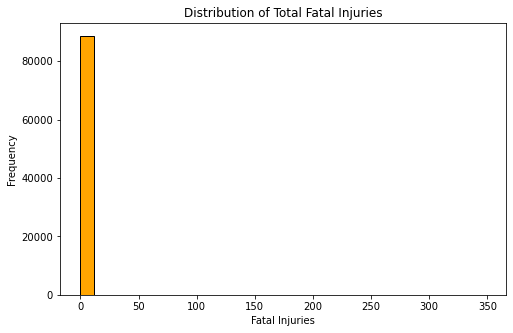

In [58]:
#Histogram for Total Fatal Injuries
plt.figure(figsize=(8, 5))
df['Total.Fatal.Injuries'].hist(bins=30, color='orange', edgecolor='black')
plt.title("Distribution of Total Fatal Injuries")
plt.xlabel("Fatal Injuries")
plt.ylabel("Frequency")
plt.grid(False)
plt.show()

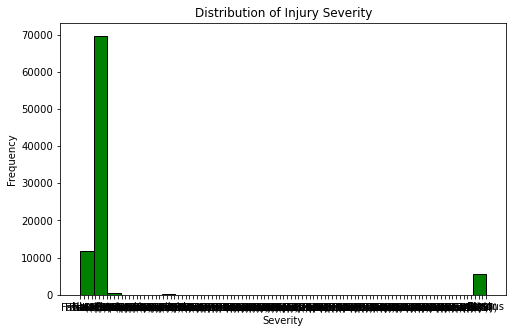

In [59]:
#Histogram for Injury Severity
plt.figure(figsize=(8, 5))
df['Injury.Severity'].hist(bins=30, color='green', edgecolor='black')
plt.title("Distribution of Injury Severity")
plt.xlabel("Severity")
plt.ylabel("Frequency")
plt.grid(False)
plt.show()

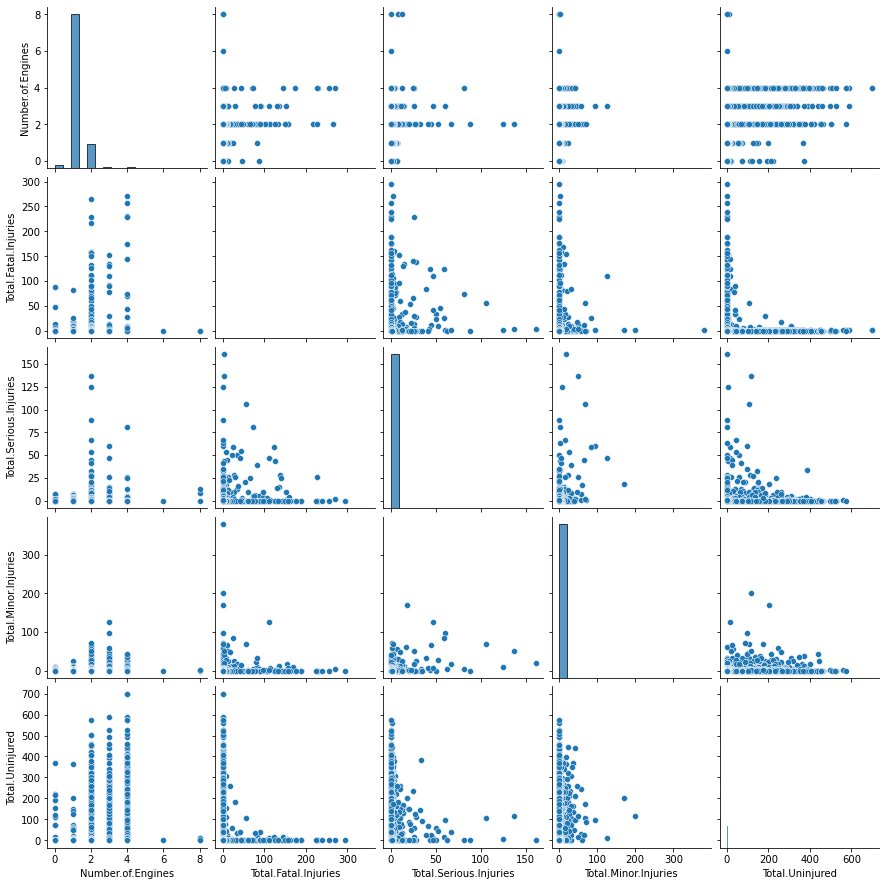

In [75]:
sns.pairplot(df)

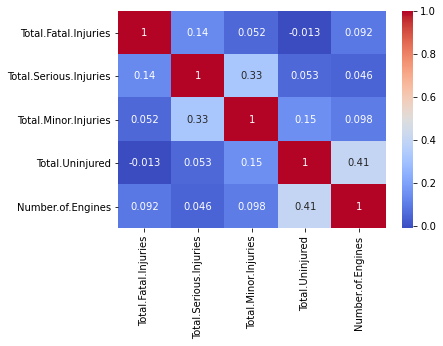

In [101]:
#Relationships between injury counts and other numerical columns
correlation_matrix = df[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 
                         'Total.Minor.Injuries', 'Total.Uninjured', 
                         'Number.of.Engines']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [102]:
#Analysis of Injury Severity by Weather Conditions
df.groupby('Weather.Condition')[['Total.Fatal.Injuries', 'Total.Serious.Injuries']].mean()


,Total.Fatal.Injuries,Total.Serious.Injuries
Weather.Condition,,
IMC,2.020644,0.419777
UNK,2.886843,0.255405
Unk,1.244275,0.500000
VMC,0.522216,0.269129


In [103]:
#Check if certain makes or models have higher fatality rates
df.groupby('Make')[['Total.Fatal.Injuries', 'Total.Serious.Injuries']].mean().sort_values(by='Total.Fatal.Injuries', ascending=False)


,Total.Fatal.Injuries,Total.Serious.Injuries
Make,,
Tupolev,210.000000,NaN
TUPOLEV,44.500000,0.0
VIKING AIR LIMITED,23.000000,0.0
Aviocar CASA,18.000000,0.0
SUKHOI,14.333333,0.0
...,...,...
Honda Jet,0.000000,0.0
Honda Aircraft,0.000000,0.0
Honda,0.000000,0.0


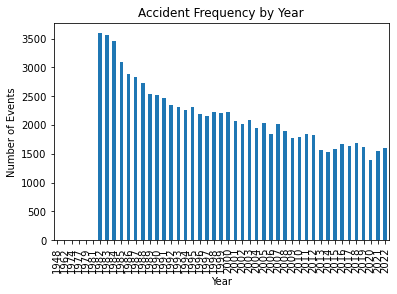

In [105]:
#Visualize Insights
#Histogram for Yearly Trends
df['Event.Year'].value_counts().sort_index().plot(kind='bar', title='Accident Frequency by Year')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.show()

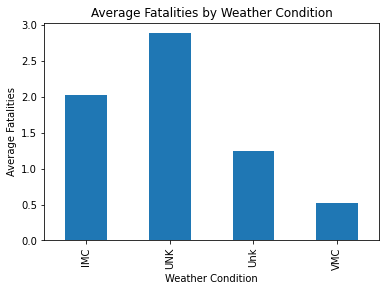

In [106]:
#Bar Chart for Weather Impact on Severity
df.groupby('Weather.Condition')['Total.Fatal.Injuries'].mean().plot(kind='bar', title='Average Fatalities by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Average Fatalities')
plt.show()

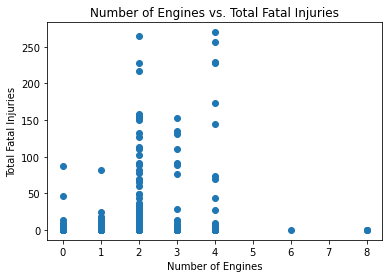

In [107]:
#Scatter Plot for Engines vs. Fatalities
plt.scatter(df['Number.of.Engines'], df['Total.Fatal.Injuries'])
plt.title('Number of Engines vs. Total Fatal Injuries')
plt.xlabel('Number of Engines')
plt.ylabel('Total Fatal Injuries')
plt.show()